# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.30 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.18749999580904841


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import torch
import matplotlib.pyplot as plt
from collections import deque
from workspace_utils import active_session

# Import agent
from agent import Agent

In [7]:
# Available device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
def train_agent(n_episodes=500, max_t=1000, solved_score=30.0, consec_episodes=100, print_every=1, train_mode=True):
    scores_list = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)       # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        # Reset environment
        env_info = env.reset(train_mode=train_mode)[brain_name]
        # Extract initial state
        states = env_info.vector_observations     
        # Prepare scores vector
        scores = np.zeros(num_agents)
        # Reset agent's noise
        agent.reset()

        for t in range(max_t):
            # Select agent's action
            actions = agent.act(states)
            # Send action to the environment
            env_info = env.step(actions)[brain_name]
            # Get state update
            next_states = env_info.vector_observations
            # Get action reward
            rewards = env_info.rewards
            # Check if episode has concluded
            dones = env_info.local_done
            
            # Save tuples in buffer
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            
            # Update episode's state and scores
            states = next_states
            scores += rewards
            
            # Exit loop if episode has concluded
            if np.any(dones): break


        # Save scores
        scores_window.append(np.mean(scores))
        scores_list.append(np.mean(scores))
        
        # Visualization
        print('\rEpisode {}\tMean Score: {:.2f}'.format(i_episode, scores_window[-1], end=""))
        if i_episode % 10 == 0:
            print('\nEpisode {}\tMean Score: {:.2f}'.format(i_episode, scores_window[-1], end=""))
                  
        if np.mean(scores_window) >= 30 and i_episode > 100:
            print('\nEnvironment solved in {: d} episodes!\tMean Score: {: .3f}'.format(i_episode - 100, scores_window[-1]))
            torch.save(agent._actor_local.state_dict(), 'actor_weights.pth')
            torch.save(agent._critic_local.state_dict(), 'critic_weights.pth')
            break
            
    return scores_list

In [9]:
def print_results(results):
    fig = plt.figure()
    plt.plot(np.arange(len(results)), results)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [10]:
agent = Agent(state_size, action_size, device=device)

with active_session():
    scores = train_agent(n_episodes=200)

Episode 1	Mean Score: 0.09
Episode 2	Mean Score: 0.56
Episode 3	Mean Score: 1.05
Episode 4	Mean Score: 0.79
Episode 5	Mean Score: 0.91
Episode 6	Mean Score: 1.16
Episode 7	Mean Score: 2.02
Episode 8	Mean Score: 1.98
Episode 9	Mean Score: 2.44
Episode 10	Mean Score: 2.56

Episode 10	Mean Score: 2.56
Episode 11	Mean Score: 3.24
Episode 12	Mean Score: 3.84
Episode 13	Mean Score: 4.25
Episode 14	Mean Score: 3.90
Episode 15	Mean Score: 4.62
Episode 16	Mean Score: 6.36
Episode 17	Mean Score: 7.48
Episode 18	Mean Score: 8.55
Episode 19	Mean Score: 8.97
Episode 20	Mean Score: 11.94

Episode 20	Mean Score: 11.94
Episode 21	Mean Score: 11.03
Episode 22	Mean Score: 12.61
Episode 23	Mean Score: 13.21
Episode 24	Mean Score: 13.78
Episode 25	Mean Score: 14.06
Episode 26	Mean Score: 14.52
Episode 27	Mean Score: 17.29
Episode 28	Mean Score: 16.75
Episode 29	Mean Score: 15.98
Episode 30	Mean Score: 16.89

Episode 30	Mean Score: 16.89
Episode 31	Mean Score: 18.43
Episode 32	Mean Score: 21.19
Episode 33	

In [16]:
print('\nEnvironment solved in {: d} episodes!\tMean Score: {: .3f}'.format(9, np.mean(scores[9:109])))


Environment solved in  9 episodes!	Mean Score:  30.227


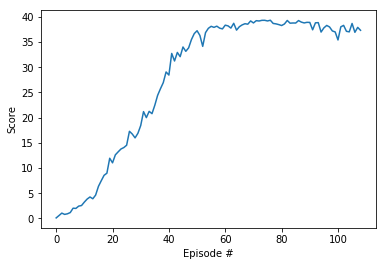

In [17]:
print_results(scores)